In [1]:
from model import SegmentationModel
import os
import glob
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

c:\Users\lachl\miniconda3\envs\fibsem\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
checkpoint = os.path.join("models", "sample.pt")
seg_model = SegmentationModel(checkpoint=checkpoint, mode="eval", num_classes=3)

# Returns np.array of RGB, or list of np.array of RGB images if inferencing multiple images
img_path = os.path.join("docs", "imgs", "raw", "image.tif") 
img = np.array(Image.open(img_path))

img_mask = seg_model.inference(img)

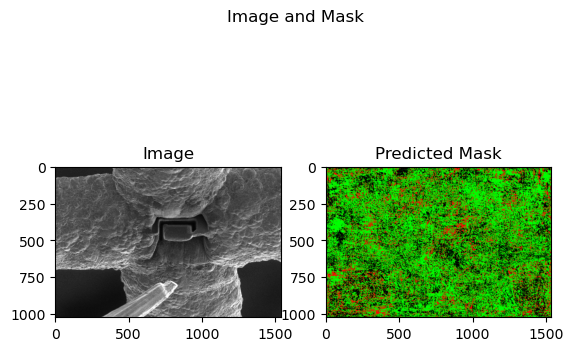

In [4]:
def show_img_and_mask(imgs, mask, title="Image and Mask"):
    """Show a plot of the image, and predicted mask"""
    if imgs.ndim == 2:
        imgs = np.expand_dims(imgs, 0)
    n_imgs = len(imgs)

    fig, ax = plt.subplots(n_imgs, 2)
    fig.suptitle(title)

    for i in range(len(imgs)):

        img = imgs[i]

        ax[0].imshow(img, cmap="gray")
        ax[0].set_title("Image")
        ax[1].imshow(mask[i])
        ax[1].set_title("Predicted Mask")
    
    plt.show()

show_img_and_mask(img, img_mask)